# Deep Learning with Python 
### Chapter 3

<br>Source: https://www.manning.com/books/dep-learning-with-python
<br>Slide Command: jupyter nbconvert DeepLearingWithPythonCH3.ipynb --to slides --post serve
<br><br>

Presentor: Kavi Sekhon

### Import Preliminaries

In [34]:
import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb
from keras import optimizers


### Preprocessing the Data

In [35]:
# Define Vectorization 
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [36]:
# Preprocessing Training and Testing Data
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the Model

In [37]:
# Model implementation in keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(61, activation='relu', ))
model.add(layers.Dense(1, activation='sigmoid'))

### Compiling the Model

In [38]:
# Compiling the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Fitting the Model

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5094 - acc: 0.7875 - val_loss: 0.3772 - val_acc: 0.8738

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Visualization the Results

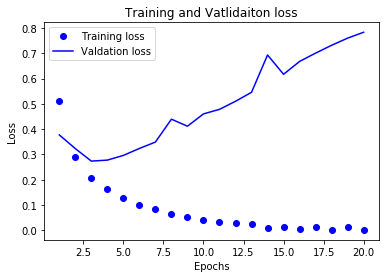

In [41]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Fix: Use "history_dict['acc']" instead for the variable "acc"
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Valdation loss')
plt.title('Training and Vatlidaiton loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

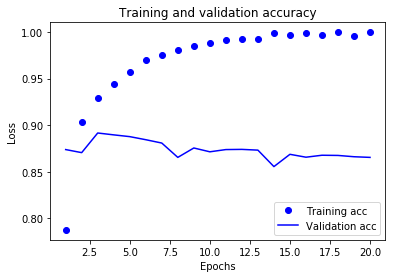

In [42]:
# Plotting the training and test validation accuracy 
plt.clf() #Clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Keras Tutorial - MultiClass Classificaiton

### Import Preliminaries

In [43]:
import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb
from keras import optimizers
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

### Preprocessing Data

In [44]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
  
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, labels] = 1
    return results

In [45]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building the Model

In [46]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Compile the Model

In [47]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Fitting the Model

In [48]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]



In [49]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 191us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120

### Visualization the Results

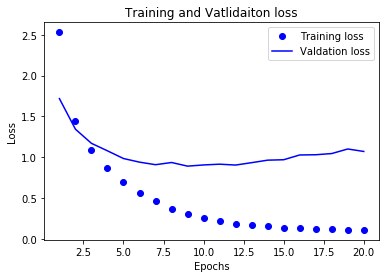

In [50]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valdation loss')
plt.title('Training and Vatlidaiton loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

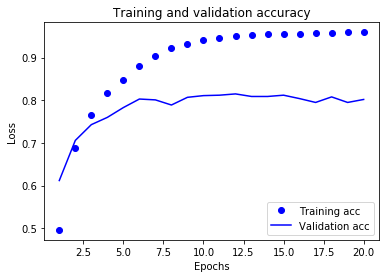

In [51]:
# Plotting the training and test validation accuracy 
plt.clf()

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Keras Tutorial - Regression Problem + KFold Cross Validation

### Import Preliminaries

In [52]:
from keras import models
from keras import layers
from keras.datasets import boston_housing
import numpy as np


### Preprocessing the Data

In [53]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= mean

### Build Your Network

### Build, Compile, and Train Model within K-Fold Cross Validation

In [55]:
k = 4

num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]], 
        axis =0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]], 
        axis =0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, 
                                      verbose=0)
    all_scores.append(val_mae)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [56]:
np.mean(all_scores)

2.3968109427997382

### Resource:

- Back Propogation Algorithims: http://ruder.io/optimizing-gradient-descent/index.html#rmsprop
- Keras Documenation: https://keras.io/